In [34]:
import pandas as pd
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline  

In [13]:
samples_phi = pd.read_csv("samples_phi.csv")
barb_samples_phi = pd.read_csv("../barbera_data/samples_phi.csv")
names = pd.read_csv("../barbera_data/samples_names.csv")
samples_mu_phi = pd.read_csv("samples_mu_phi.csv")
samples_sigma_phi = pd.read_csv("samples_sigma_phi.csv")
#adj_matrix = pd.read_csv("adj-matrix-FR-stage1.csv",index_col=0)
#elites_data = pd.read_csv("fr_elites_data.csv",index_col=0)

In [23]:
to_remove = ['pedropierluisi', 'EleanorNorton']
barb_phi = barb_phi.drop('phi.115', axis=0)
barb_phi = barb_phi.drop('phi.177', axis=0)

In [7]:
barb_phi = barb_samples_phi.mean(axis=0)

In [42]:
barb_phi_center = barb_phi - barb_phi.mean()
phi_center = phi - phi.mean()

In [50]:
phi_center.values.dot(barb_phi_center.values)/(np.linalg.norm(phi_center)*np.linalg.norm(barb_phi_center))

0.099257802027511624

In [8]:
# i subtract the mean to get negative values too
phi = samples_phi.mean(axis=0)
mu_phi = samples_mu_phi.mean(axis=0)
sigma_phi = samples_sigma_phi.mean(axis=0)
print(phi.mean())
print(mu_phi.mean())
print(sigma_phi.mean())

0.0550634963666
-0.00869135801825
1.68720601831


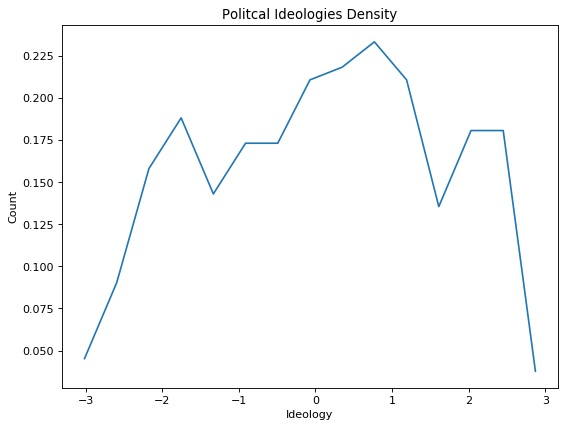

In [34]:
plt.figure(figsize=(8,6), dpi=80)
plt.subplot(111)
y,binEdges=np.histogram(phi, bins=15, density=True)
bincenters = 0.5*(binEdges[1:]+binEdges[:-1])
plt.plot(bincenters,y,'-')
plt.title("Politcal Ideologies Density")
plt.xlabel("Ideology")
plt.ylabel("Count")
plt.show()

In [ ]:
##### skip this cell
import utils
import tweepy
api = utils.get_tweepy_api(3)
followers = []
for i in range(elites_data.shape[0]):
    eid, name = elites_data.iloc[i][['id', 'screen_name']]
    user = utils.tweepy_api_call(api.get_user, id=eid)
    if not user:
        print(name)
        continue
    followers.append((user.followers_count, name))

In [ ]:
#skip this cell
import json
print(json.dumps(sorted(followers, reverse=True), indent=2))

In [52]:
vip = [
    'glennbeck',
    'FoxNews',
    'MittRomney',
    'SarahPalinUSA',
    'newtgingrich',
    'nytimes',
    'algore',
    'BarackObama',
    'maddow'
]


In [53]:
phi[vip]

glennbeck        1.076726
FoxNews          2.448009
MittRomney       0.427697
SarahPalinUSA    1.471114
newtgingrich     0.404426
nytimes          1.117123
algore          -0.564392
BarackObama     -0.110664
maddow           0.177281
dtype: float64

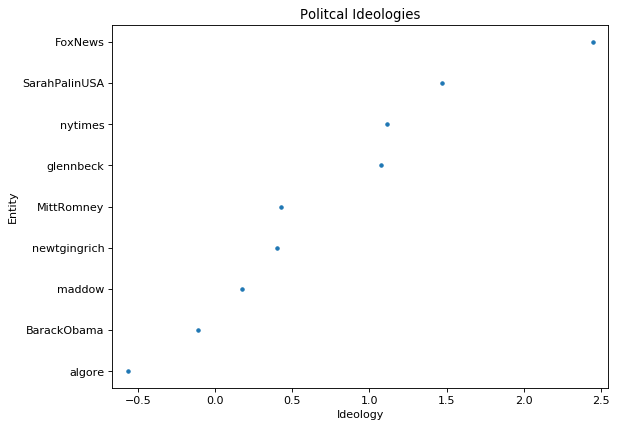

In [54]:
plt.figure(figsize=(8,6), dpi=80)
plt.subplot(111)

sort = phi[vip].sort_values()
y_labels = list(sort.index)
x = np.arange(len(vip))
plt.plot(sort.values, x, '.')
plt.title("Politcal Ideologies")
plt.xlabel("Ideology")
plt.ylabel("Entity")

plt.xlim(sort.values[0]-0.1, sort.values[-1]+0.1)

plt.yticks(np.arange(len(vip)), y_labels)

plt.show()

In [55]:
samples_sigma_alpha = pd.read_csv("samples_sigma_alpha.csv")
samples_alpha = pd.read_csv("samples_alpha.csv")

In [56]:
sigma_alpha = samples_sigma_alpha.mean(axis=0)
alpha = samples_alpha.mean(axis=0)
print(alpha.mean())
print(sigma_alpha.mean())

-1.11507921835
1.14243362275
